In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

In [2]:
basePath = '../sims.TNG/TNG100-1/output/'

0c. Show the two-dimensional distribution, in space, of all halos in the simulation.

In [3]:
fields = ['GroupPos', 'GroupMass']

In [4]:
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)
header = il.groupcat.loadHeader(basePath, 99)

In [40]:
x = halos['GroupPos'][:, 0] # a = 1 at z = 0
y = halos['GroupPos'][:, 1] # a = 1 at z = 0
weights = np.log10(halos['GroupMass'] * 1e10 / 0.6774)
nPixels = [600,600]
minMax = [0, (header['BoxSize'])]

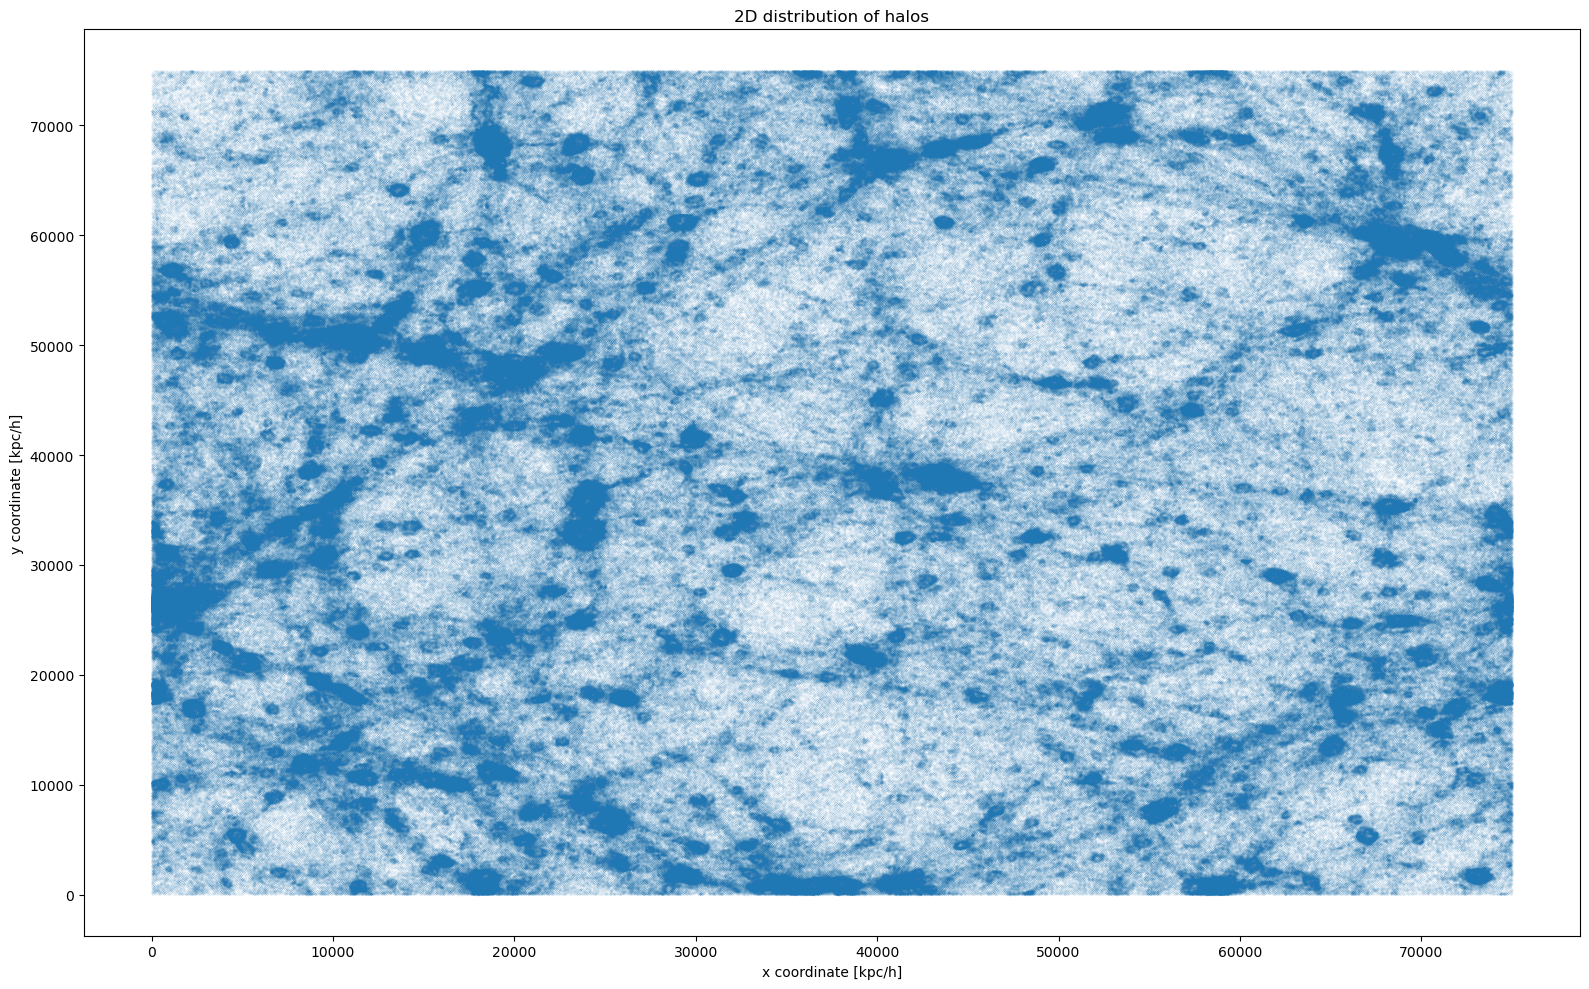

In [18]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(x, y, '.', markersize=0.05)
ax.set_xlabel('x coordinate [kpc/h]')
ax.set_ylabel('y coordinate [kpc/h]')
ax.set_title('2D distribution of halos')

plt.tight_layout()
plt.show()

0d. Take the previous plot and use color, size, or symbol to show another property of each halo, such as mass.

In [41]:
grid, _, _, _ = binned_statistic_2d(x, y, weights, 'sum', bins=nPixels, range=[minMax,minMax])

In [42]:
grid_msun = grid * 1e10 / 0.6774

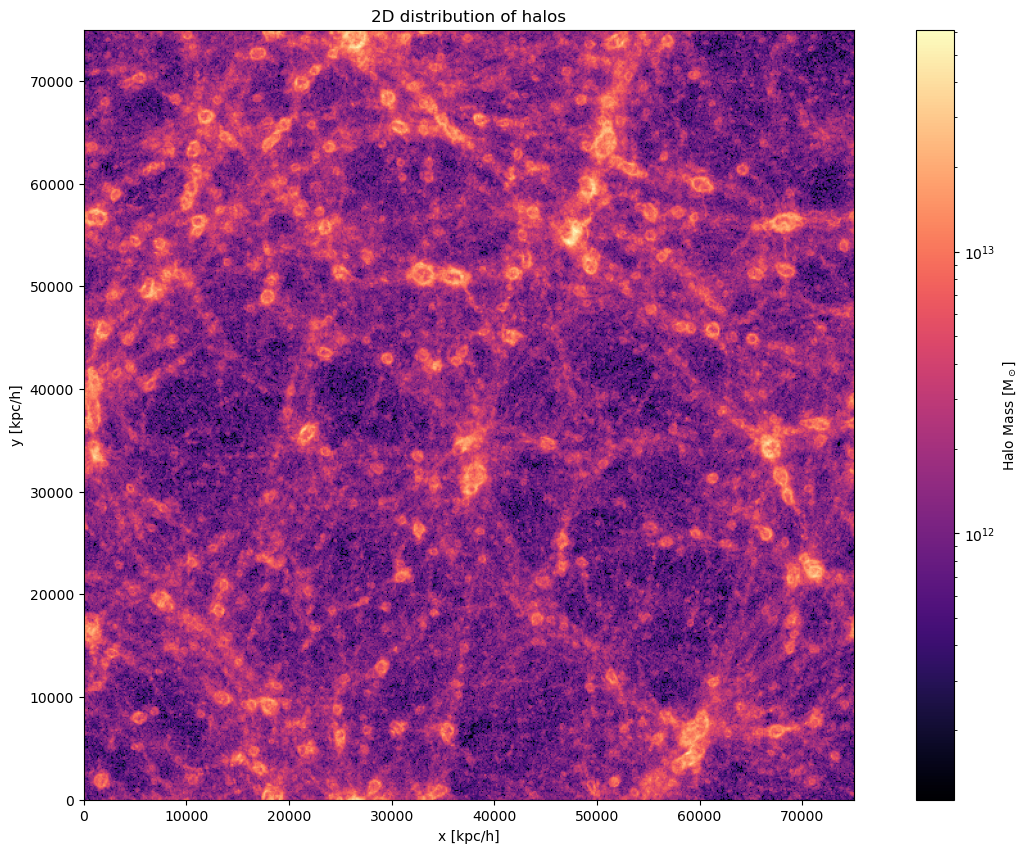

In [43]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

extent = [0, header['BoxSize'], 0, header['BoxSize']]
plt.imshow(grid_msun, extent=extent, cmap='magma', norm='log', aspect=nPixels[1]/nPixels[0])
ax.autoscale(False)
ax.set_xlabel('x [kpc/h]')
ax.set_ylabel('y [kpc/h]')
ax.set_title('2D distribution of halos')
plt.colorbar(label='Halo Mass [M$_\odot$]');